# Data 3

Jianwei Qian A20346099

## 1. Data set
Statlog (German Credit Data) Data Set. <https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)>

This dataset classifies people as with good or bad credit based on a set of attributes. The features include Balance of checking/saving account, Duration in month, Credit history, Credit amount, Marital status and sex, Property, Age, Housing, Job, etc. Notice ordered categorical attributes are coded as integer and unordered categorical attributes are split into multiple binary attributes.

20 features, 1000 instances

**Categorical features:** 13 in total

Chckg_acct_status, credit_hist, purpose, saving_acct_status, employ_hist, sex&marital, other_debtors, property, installment_plans, housing, job, tel_provided, foreign_worker

**Continuous features:** 7 in total

Duration_in_month, credit_amount, installment_rate, residence_since, age, #existing_credits, #people_liable

To see detailed explanations of them, please refer to <https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)>

## 2. Load data

In [189]:
# Load data
import csv
import numpy as np
reader=csv.reader(open("german-numeric.csv","rt"),delimiter=',')
data=list(reader)
Xy=np.array(data).astype('int')
X=Xy[:,0:20]
y=Xy[:,20]
print('Data shape:\n%d features, %d instances' % (len(X[0]),len(X)))
print('\nHead 5 lines of X:')
print(X[:5])
y=-2*(y-1.5) # the y values are 1's and 2's, so we need to transform them to 1's and (-1)'s
print('\nHead 5 lines of y (1 = Good credit, -1 = Bad credit):')
print(y[:5])

Data shape:
20 features, 1000 instances

Head 5 lines of X:
[[   1    6    4    3 1169    5    5    4    3    1    4    1   67    3
     2    2    3    1    2    1]
 [   2   48    2    3 5951    1    3    2    2    1    2    1   22    3
     2    1    3    1    1    1]
 [   4   12    4    6 2096    1    4    2    3    1    3    1   49    3
     2    1    2    2    1    1]
 [   1   42    2    2 7882    1    4    2    3    3    4    2   45    3
     3    1    3    2    1    1]
 [   1   24    3    0 4870    1    3    3    3    1    4    4   53    3
     3    2    3    2    1    1]]

Head 5 lines of y (1 = Good credit, -1 = Bad credit):
[ 1. -1.  1.  1. -1.]


## 3. Feature binarization
Categorical features are binarized using one-hot encoding.

In [190]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(categorical_features=[0,2,3,5,6,8,9,11,13,14,16,18,19])
X_new=enc.fit_transform(X).toarray().astype(int)
print('\nHead 5 lines of new X:')
print(X_new[:5])


Head 5 lines of new X:
[[   1    0    0    0    0    0    0    0    1    0    0    0    1    0
     0    0    0    0    0    0    0    0    0    1    0    0    0    0
     1    0    0    1    0    1    0    0    1    0    0    0    0    0
     1    0    1    0    0    0    1    0    0    1    1    0    6 1169
     4    4   67    2    1]
 [   0    1    0    0    0    0    1    0    0    0    0    0    1    0
     0    0    0    0    0    1    0    0    0    0    0    0    1    0
     0    0    1    0    0    1    0    0    1    0    0    0    0    0
     1    0    1    0    0    0    1    0    1    0    1    0   48 5951
     2    2   22    1    1]
 [   0    0    0    1    0    0    0    0    1    0    0    0    0    0
     0    1    0    0    0    1    0    0    0    0    0    0    0    1
     0    0    0    1    0    1    0    0    1    0    0    0    0    0
     1    0    1    0    0    1    0    0    1    0    1    0   12 2096
     2    3   49    1    2]
 [   1    0    0    0    0  

In [191]:
feature_names=[
    'Chckg_acct_status:<0DM','Chckg_acct_status:<200DM','Chckg_acct_status:>200DM','Chckg_acct_status:no_acct',
    'credit_hist:0','credit_hist:1','credit_hist:2','credit_hist:3','credit_hist:4',
    'purpose:new_car','purpose:used_car','purpose:furniture','purpose:radio','purpose:appliance','purpose:repairs',
    'purpose:education','purpose:retraining','purpose:business','purpose:other',
    'saving_acct_status:<100DM','saving_acct_status:<500DM','saving_acct_status:<1000DM','saving_acct_status:>1000','saving_acct_status:no_acct',
    'employ_hist:unempl','employ_hist:1year','employ_hist:4years','employ_hist:7years','employ_hist:>7years',
    'sex&marital:M&divorced','sex&marital:F&divorced/married','sex&marital:M&single','sex&marital:M&married', #'sex&marital:F&single' doesn't exist
    'other_debtors:none','other_debtors:co-applicant','other_debtors:guarantor',
    'property:real_estate','property:life_insurance','property:car','property:none',
    'installment_plans:bank','installment_plans:stores','installment_plans:none',
    'housing:rent','housing:own','housing:free','job:unempl','job:unskilled','job:skilled','job:highly_qualified',
    'tel_provided:none','tel_provided:yes','foreign_worker:yes','foreign_worker:no',
    'Duration_in_month','credit_amount','installment_rate','residence_since','age','#existing_credits','#people_liable'
]
target_names=["Bad credit(-1)","Good credit(1)"]
print('%d binary features in total' % len(feature_names))
print('The shape of X_new is', X_new.shape)

61 binary features in total
The shape of X_new is (1000, 61)


## 4. Train-test split

In [192]:
from sklearn.model_selection import train_test_split
import random
random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.333,random_state=10)
#X_train[:4]

## 5. Important features

### L2-regularized logistic regression

In [193]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l2') #,random_state=1
clf.fit(X_train,y_train)
#predictions=clf.predict(X_test)
feat_coef=[(feature_names[i],clf.coef_[0][i]) for i in range(len(feature_names))]
feat_coef=sorted(feat_coef,key=lambda x:abs(x[1]),reverse=True )
print("Top 10 features and their weights")
feat_coef[:10]

Top 10 features and their weights


[('Chckg_acct_status:no_acct', 1.1941638355336786),
 ('credit_hist:4', 0.87434690488821143),
 ('other_debtors:guarantor', 0.80687772739324437),
 ('purpose:used_car', 0.70873777116510461),
 ('installment_plans:none', 0.63580783282285691),
 ('Chckg_acct_status:<0DM', -0.60637929028818427),
 ('sex&marital:M&single', 0.60364424459618593),
 ('foreign_worker:no', 0.58352864832813622),
 ('employ_hist:7years', 0.57105694985834676),
 ('housing:free', 0.56047827400535388)]

### L1-regularized logistic regression

In [194]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l1')
clf.fit(X_train,y_train)
#predictions=clf.predict(X_test)
feat_coef=[(feature_names[i],clf.coef_[0][i]) for i in range(len(feature_names))]
feat_coef=sorted(feat_coef,key=lambda x:abs(x[1]),reverse=True )
print("Top 10 features and their weights")
feat_coef[:10]

Top 10 features and their weights


[('Chckg_acct_status:no_acct', 1.3636402341414944),
 ('other_debtors:guarantor', 1.0363969905660955),
 ('credit_hist:4', 1.0141016195310697),
 ('installment_plans:none', 0.69983171010696743),
 ('purpose:used_car', 0.69804328381364056),
 ('housing:free', 0.59058534495430637),
 ('purpose:new_car', -0.51980849800004503),
 ('saving_acct_status:<100DM', -0.51072425756294793),
 ('saving_acct_status:>1000', 0.50444090341338677),
 ('Chckg_acct_status:<0DM', -0.5007363338087496)]

### Decision tree

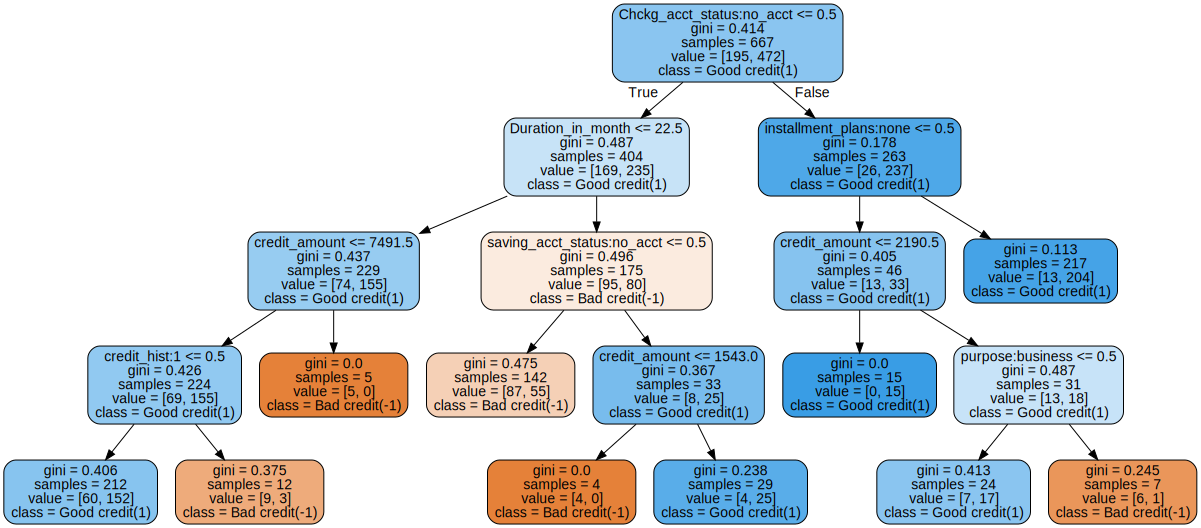

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
clf=DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clf.fit(X_train,y_train)
dot_data=export_graphviz(clf,out_file=None,feature_names=feature_names,class_names=target_names,filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph

### Discussion

The results of L2/L1 regularized logisitic regression are mostly consistent. The result of decision tree is somewhat different from them. 

Based on these results, the key features determining people's credit include checking account status, savings account status, credit history, whether foreign_worker or not, sex & marital status, purpose of loan, employment history, etc. The features selected are all consistent with my intuition.

### Z-score

In [196]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

a = {}
a['X_train'] = X_train
a['y_train'] = y_train
a['X_test'] = X_test
a['y_test'] = y_test
a['target_names'] = target_names
a['feature_names'] = feature_names
import pickle
pickle.dump(a, open("jqian15.pickle", "wb"))

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### L2-regularized logistic regression (Z-scored)

In [197]:
from sklearn.linear_model import LogisticRegression
clf_l2=LogisticRegression(penalty='l2')
clf_l2.fit(X_train,y_train)
#predictions=clf.predict(X_test)
feat_coef=[(feature_names[i],clf_l2.coef_[0][i]) for i in range(len(feature_names))]
feat_coef=sorted(feat_coef,key=lambda x:abs(x[1]),reverse=True )
print("Top 10 features and their weights")
feat_coef[:10]

Top 10 features and their weights


[('Chckg_acct_status:no_acct', 0.51172040110734307),
 ('Chckg_acct_status:<0DM', -0.38841602767577216),
 ('Duration_in_month', -0.35793890323912514),
 ('installment_rate', -0.34184134641369535),
 ('credit_amount', -0.34182112722925845),
 ('credit_hist:4', 0.29699811431201095),
 ('purpose:new_car', -0.27602897142763072),
 ('saving_acct_status:<100DM', -0.25427296418019674),
 ('purpose:used_car', 0.25354393467412262),
 ('saving_acct_status:>1000', 0.24275346825470442)]

### L1-regularized logistic regression (Z-scored)

In [198]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l1')
clf.fit(X_train,y_train)
#predictions=clf.predict(X_test)
feat_coef=[(feature_names[i],clf.coef_[0][i]) for i in range(len(feature_names))]
feat_coef=sorted(feat_coef,key=lambda x:abs(x[1]),reverse=True )
print("Top 10 features and their weights")
feat_coef[:10]

Top 10 features and their weights


[('Chckg_acct_status:no_acct', 0.67861175130116935),
 ('credit_hist:4', 0.42215634301655142),
 ('Duration_in_month', -0.35205159028009481),
 ('installment_rate', -0.31988877905578017),
 ('credit_amount', -0.31287978656157434),
 ('saving_acct_status:<100DM', -0.29157236051886087),
 ('purpose:new_car', -0.27539314624822819),
 ('property:none', -0.25609688931516783),
 ('purpose:used_car', 0.23111386252505878),
 ('installment_plans:none', 0.22782855359417484)]

### Decision tree (Z-scored)

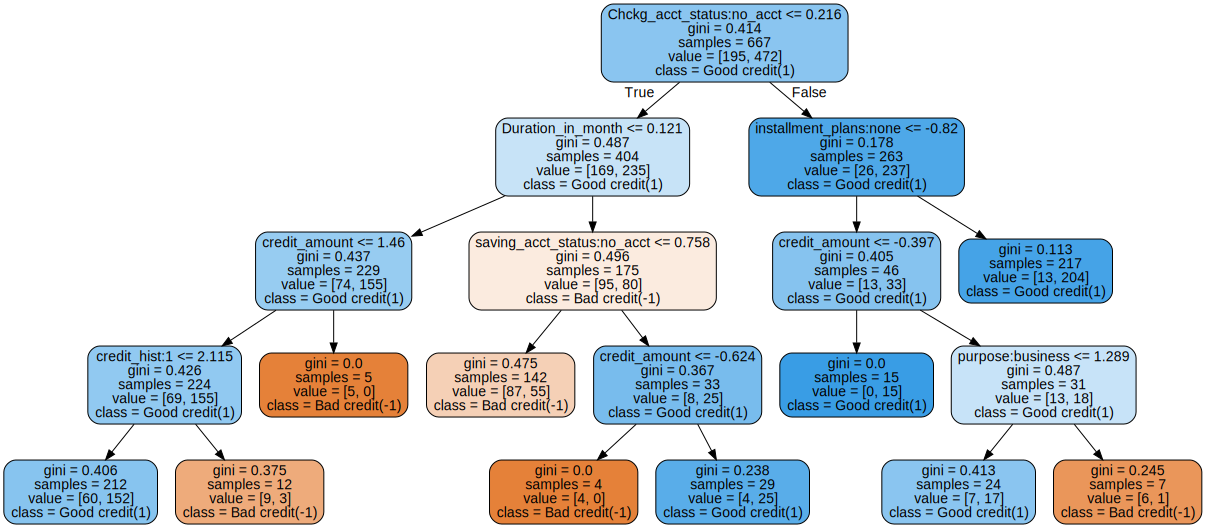

In [199]:
clf=DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clf.fit(X_train,y_train)
dot_data=export_graphviz(clf,out_file=None,feature_names=feature_names,class_names=target_names,filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph

### Discussion

The results of L2/L1 regularized logisitic regression are different than before,
but the result of decision tree is the same as before.

They are still consistent with my intuition as well. The key features determining people's credit include checking account status, installment_rate, duration in month, credit history, existing credit amount, purpose of loan, etc.

## 6. Evidence

In [200]:
# We will use the L2 regularized logistic regression model trained on the Z-scored data.
probabilites=clf_l2.predict_proba(X_test)


def total_neg_pos_evidence(idx):
    total_pos_evi=0
    total_neg_evi=0
    for i in range(len(feature_names)):
        evid=clf_l2.coef_[0][i]*X_test[idx][i]
        if evid<0:
            total_neg_evi+=evid
        else:
            total_pos_evi+=evid
#        if feat_coef[i]<0:
#            total_neg_evi+=clf_l2.coef_[0][i]*X_test[idx][i]
#        else:
#            total_pos_evi+=clf_l2.coef_[0][i]*X_test[idx][i]
    return total_neg_evi,total_pos_evi

def print_info(idx):
    print("[Object",idx,"]\n")
    total_neg_evi,total_pos_evi=total_neg_pos_evidence(idx)
    print("Total positive evidence\t",total_pos_evi)
    print("Total negative evidence\t",total_neg_evi)
    print("Probability distribution\t",probabilites[idx])
    feat_evidence=[(i,clf_l2.coef_[0][i]*X_test[idx][i]) for i in range(len(feature_names))]
    feat_evidence_ascending=sorted(feat_evidence, key=lambda x: x[1]) 
    feat_evidence_descending=sorted(feat_evidence, key=lambda x: -x[1]) 
    print("\nTop 3 feature values contributing to positive evidence:")
    for i,evid in feat_evidence_descending[:3]:
        print(feature_names[i],'=',X_test[idx][i],',\t evidence =',evid)
    print("\nTop 3 feature values contributing to negative evidence:")
    for i,evid in feat_evidence_ascending[:3]:
        print(feature_names[i],'=',X_test[idx][i],',\t evidence =',evid)

### The most positive object with respect to the probabilities

In [201]:

idx=np.argmax(probabilites[:,1])
print_info(idx)

[Object 107 ]

Total positive evidence	 6.74348657861
Total negative evidence	 -1.49965005508
Probability distribution	 [ 0.00139101  0.99860899]

Top 3 feature values contributing to positive evidence:
purpose:retraining = 14.8772757363 ,	 evidence = 2.45360836325
Chckg_acct_status:no_acct = 1.23940375706 ,	 evidence = 0.634228187694
Duration_in_month = -1.23332356029 ,	 evidence = 0.441454482509

Top 3 feature values contributing to negative evidence:
installment_rate = 0.938167819362 ,	 evidence = -0.320704550533
#people_liable = 2.36726855174 ,	 evidence = -0.250455177496
credit_hist:4 = -0.659096807875 ,	 evidence = -0.195750509088


### The most negative object with respect to the probabilities

In [202]:

idx=np.argmax(probabilites[:,0])
print_info(idx)

[Object 195 ]

Total positive evidence	 1.58565166314
Total negative evidence	 -6.11744025109
Probability distribution	 [ 0.96080766  0.03919234]

Top 3 feature values contributing to positive evidence:
installment_rate = -1.70216102247 ,	 evidence = 0.581869015734
purpose:new_car = -0.561766725646 ,	 evidence = 0.155063891462
#existing_credits = -0.70786042311 ,	 evidence = 0.151893322567

Top 3 feature values contributing to negative evidence:
credit_amount = 3.03952706098 ,	 evidence = -1.03897456623
sex&marital:M&divorced = 4.52947337251 ,	 evidence = -0.825418488344
Chckg_acct_status:<0DM = 1.6262867961 ,	 evidence = -0.631675857203


### The object that has the largest positive evidence

In [203]:
object_evidence=[total_neg_pos_evidence(i) for i in range(len(X_test))]
object_pos_evidence=[object_evidence[i][1] for i in range(len(X_test))]
idx=np.argmax(object_pos_evidence)
print_info(idx)

[Object 107 ]

Total positive evidence	 6.74348657861
Total negative evidence	 -1.49965005508
Probability distribution	 [ 0.00139101  0.99860899]

Top 3 feature values contributing to positive evidence:
purpose:retraining = 14.8772757363 ,	 evidence = 2.45360836325
Chckg_acct_status:no_acct = 1.23940375706 ,	 evidence = 0.634228187694
Duration_in_month = -1.23332356029 ,	 evidence = 0.441454482509

Top 3 feature values contributing to negative evidence:
installment_rate = 0.938167819362 ,	 evidence = -0.320704550533
#people_liable = 2.36726855174 ,	 evidence = -0.250455177496
credit_hist:4 = -0.659096807875 ,	 evidence = -0.195750509088


### The object that has the largest negative evidence

In [204]:
object_neg_evidence=[object_evidence[i][0] for i in range(len(X_test))]
idx=np.argmin(object_neg_evidence) # largest in magnitude
print_info(idx)

[Object 19 ]

Total positive evidence	 2.91575886541
Total negative evidence	 -6.66245386895
Probability distribution	 [ 0.91790368  0.08209632]

Top 3 feature values contributing to positive evidence:
purpose:other = 8.55050355892 ,	 evidence = 0.640122969739
housing:free = 2.8973032629 ,	 evidence = 0.583131838948
saving_acct_status:<100DM = -1.22781057048 ,	 evidence = 0.312199033209

Top 3 feature values contributing to negative evidence:
credit_amount = 4.0151119403 ,	 evidence = -1.37245008938
Duration_in_month = 3.19910988558 ,	 evidence = -1.14508588379
credit_hist:1 = 4.4546324203 ,	 evidence = -0.881743583949


### The most uncertain object

In [205]:
idx=np.argmin(abs(probabilites[:,0]-probabilites[:,1]))
print_info(idx)

[Object 294 ]

Total positive evidence	 2.22843943645
Total negative evidence	 -3.5572485009
Probability distribution	 [ 0.49907834  0.50092166]

Top 3 feature values contributing to positive evidence:
credit_hist:4 = 1.51722780031 ,	 evidence = 0.450613795672
Chckg_acct_status:<0DM = -0.614897693567 ,	 evidence = 0.238836119562
property:life_insurance = 1.83288764636 ,	 evidence = 0.220589634543

Top 3 feature values contributing to negative evidence:
Duration_in_month = 1.96787837284 ,	 evidence = -0.704380226482
employ_hist:1year = 2.17944947177 ,	 evidence = -0.490861643044
Chckg_acct_status:no_acct = -0.806839574519 ,	 evidence = -0.412876270702
